In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os 
import sys
import time
import tensorflow as tf
from tensorflow import keras

F:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
F:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
F:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
F:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is 

In [2]:
print(tf.__version__)

2.0.0-beta1


In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all,y_train_all),(x_test,y_test) = fashion_mnist.load_data()
x_valid,x_train = x_train_all[:5000],x_train_all[5000:]
y_valid,y_train = y_train_all[:5000],y_train_all[5000:]

4423680/4422102 [==============================] - 88s 20us/step


In [7]:
print(x_valid.shape,y_valid.shape)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


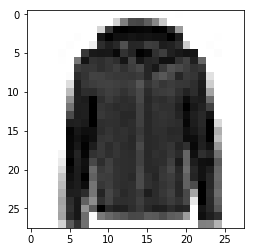

In [9]:
def show_single_img(img_arr):
    plt.imshow(img_arr,cmap='binary')
    plt.show()
show_single_img(x_train[0])

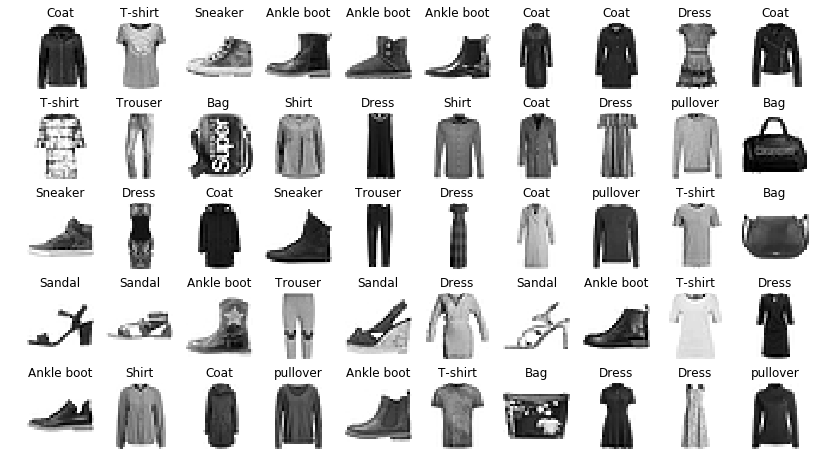

In [15]:
def show_img(n_row,n_col,x_data,y_data,class_name):
    assert len(x_data)==len(y_data)
    assert n_col*n_row < len(x_data)
    plt.figure(figsize=(n_col*1.4,n_row*1.6))
    for row in range(n_row):
        for col in range(n_col):
            index = n_col * row + col
            plt.subplot(n_row,n_col,index+1)
            plt.imshow(x_data[index],cmap='binary',interpolation='nearest')
            plt.axis('off')
            plt.title(class_name[y_data[index]])
    plt.show()

class_name = ['T-shirt','Trouser','pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

show_img(5,10,x_train,y_train,class_name)
                  

In [25]:
#tf.keras.models.Sequential

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300,activation="relu"),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(10,activation="softmax")])

model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])


In [26]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_10 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [27]:
history = model.fit(x_train,y_train,epochs=10,
                   validation_data=(x_valid,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 3s 54us/sample - loss: 14.5028 - accuracy: 0.1002 - val_loss: 14.5450 - val_accuracy: 0.0976
Epoch 2/10
55000/55000 [==============================] - 3s 53us/sample - loss: 14.5028 - accuracy: 0.1002 - val_loss: 14.5450 - val_accuracy: 0.0976
Epoch 3/10
55000/55000 [==============================] - 3s 47us/sample - loss: 14.5028 - accuracy: 0.1002 - val_loss: 14.5450 - val_accuracy: 0.0976
Epoch 4/10
55000/55000 [==============================] - 3s 50us/sample - loss: 14.5028 - accuracy: 0.1002 - val_loss: 14.5450 - val_accuracy: 0.0976
Epoch 5/10
55000/55000 [==============================] - 3s 48us/sample - loss: 14.5028 - accuracy: 0.1002 - val_loss: 14.5450 - val_accuracy: 0.0976
Epoch 6/10
55000/55000 [==============================] - 3s 50us/sample - loss: 14.5028 - accuracy: 0.1002 - val_loss: 14.5450 - val_accuracy: 0.0976
Epoch 7/10
55000/55000 [=====================

In [22]:
history.history

{'loss': [14.507459799887917,
  14.507459810430353,
  14.507459802800959,
  14.507459796836159,
  14.507459832208808,
  14.507459801552512,
  14.507459812094949,
  14.507459813065962,
  14.507459813343395,
  14.507459802939675],
 'accuracy': [0.09992728,
  0.09992728,
  0.09992728,
  0.09992728,
  0.09992728,
  0.09992728,
  0.09992728,
  0.09992728,
  0.09992728,
  0.09992728],
 'val_loss': [14.49339306488037,
  14.493393058776855,
  14.49339309387207,
  14.493393087768554,
  14.493393156433106,
  14.493393081665038,
  14.493393112182618,
  14.493393156433106,
  14.493393060302735,
  14.493393124389648],
 'val_accuracy': [0.1008,
  0.1008,
  0.1008,
  0.1008,
  0.1008,
  0.1008,
  0.1008,
  0.1008,
  0.1008,
  0.1008]}

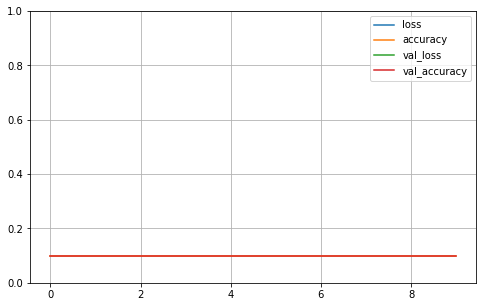

In [28]:
def plt_learning_curve(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()

plt_learning_curve(history)